In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [5]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [8]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [9]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [10]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [14]:
X_train.shape

(8000, 11)

In [15]:
y_train.shape

(8000,)

In [16]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [18]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, init = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dropout(0.3))
# Adding the second hidden layer
classifier.add(Dense(units = 20, init = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.4))

# Adding the output layer
classifier.add(Dense(units = 15, init = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)



C:\Users\Shubham\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="relu", input_dim=11, kernel_initializer="he_uniform")`
  """
C:\Users\Shubham\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=20, activation="relu", kernel_initializer="he_uniform")`
  
C:\Users\Shubham\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=15, activation="relu", kernel_initializer="he_uniform")`
  if sys.path[0] == '':
C:\Users\Shubham\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  from ipykernel import kernelapp as app
C:\Users\Shubham\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 5s 995us/step - loss: 0.6373 - accuracy: 0.7309 - val_loss: 0.5092 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 3s 509us/step - loss: 0.5584 - accuracy: 0.7761 - val_loss: 0.4871 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 2s 375us/step - loss: 0.5297 - accuracy: 0.7830 - val_loss: 0.4786 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 3s 529us/step - loss: 0.4962 - accuracy: 0.7938 - val_loss: 0.4726 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 3s 499us/step - loss: 0.4918 - accuracy: 0.7925 - val_loss: 0.4667 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 3s 506us/step - loss: 0.4868 - accuracy: 0.7923 - val_loss: 0.4641 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 3s 529us/ste

Epoch 55/100
5359/5359 [==============================] - 2s 414us/step - loss: 0.3960 - accuracy: 0.8356 - val_loss: 0.3955 - val_accuracy: 0.8175
Epoch 56/100
5359/5359 [==============================] - 2s 419us/step - loss: 0.3959 - accuracy: 0.8378 - val_loss: 0.3965 - val_accuracy: 0.8152
Epoch 57/100
5359/5359 [==============================] - 3s 500us/step - loss: 0.3863 - accuracy: 0.8412 - val_loss: 0.3940 - val_accuracy: 0.8190
Epoch 58/100
5359/5359 [==============================] - 3s 481us/step - loss: 0.3933 - accuracy: 0.8390 - val_loss: 0.3936 - val_accuracy: 0.8179
Epoch 59/100
5359/5359 [==============================] - 3s 478us/step - loss: 0.3942 - accuracy: 0.8377 - val_loss: 0.3924 - val_accuracy: 0.8205
Epoch 60/100
5359/5359 [==============================] - 2s 463us/step - loss: 0.3943 - accuracy: 0.8350 - val_loss: 0.3925 - val_accuracy: 0.8213
Epoch 61/100
5359/5359 [==============================] - 3s 491us/step - loss: 0.3862 - accuracy: 0.8386 - val_

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


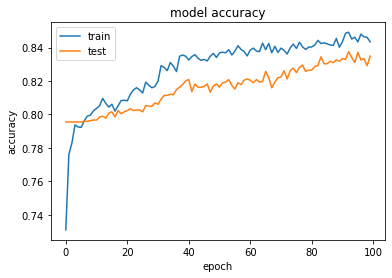

In [19]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

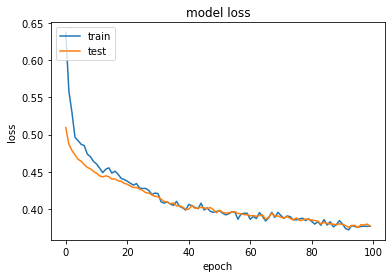

In [20]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [21]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1584,   11],
       [ 297,  108]], dtype=int64)

In [23]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print('Accuracy :- ',score)

Accuracy :-  0.846
